# Telco Customer Churn

### 1. Introduction

#### Problem Overview

In a subscription-based business, customer churn refers
 to customers leaving or cancelling their service.
 Accurately predicting which customers are likely to churn enables proactive retention strategies, reducing revenue loss.

 This project uses machine learning techniques to classify whether a customer will churn based on behavioral and service-related features.


#### Dataset Descitption

[Dataset Link](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

### Housekeeping

In [ ]:
!pip install ipython-autotime
%load_ext autotime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.8 MB/s eta 0:00:00
time: 358 µs (started: 2025-07-16 02:19:10 +00:00)


### Data

#### Data Loading

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn
time: 4.4 s (started: 2025-07-16 02:19:10 +00:00)


In [ ]:
import pandas as pd

df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

time: 818 ms (started: 2025-07-16 02:19:14 +00:00)


In [ ]:
df.shape

(7043, 21)

time: 5.17 ms (started: 2025-07-16 02:19:15 +00:00)


#### Initial Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# check missing values
df.isnull().sum()



,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


time: 26.1 ms (started: 2025-07-16 02:19:15 +00:00)


In [ ]:
# check unique values
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


time: 41.1 ms (started: 2025-07-16 02:19:19 +00:00)


#### Data Cleansing

In [ ]:
# Drop customerID
df.drop(columns=['customerID'], inplace=True)

time: 5.58 ms (started: 2025-07-16 02:19:21 +00:00)


In [ ]:
# object (string) — to - numeric.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# df.info()

time: 12.1 ms (started: 2025-07-16 02:19:22 +00:00)


In [ ]:
# Convert target variable Churn to 0 and 1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
#df.head()

time: 5.65 ms (started: 2025-07-16 02:19:23 +00:00)


In [ ]:
# check categorical columns - will eventually need to be encoded.
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
time: 7.29 ms (started: 2025-07-16 02:19:24 +00:00)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


time: 132 ms (started: 2025-07-16 02:19:25 +00:00)


#### Exploratory Data Analysis

Columns like State, International Plan, and Voice Mail Plan contain text categories that need to be turned into numbers for the model to understand.

`LabelEncoder()` does this by giving each unique value a numeric code. We simply loop through these columns and use `fit_transform()` to convert them.



In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    df[col] = labelencoder.fit_transform(df[col])

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


time: 1.6 s (started: 2025-07-16 02:19:28 +00:00)


we make sure all numeric columns are clean.
TotalCharges sometimes has empty strings, so we use `pd.to_numeric` to convert it, turning invalid entries into `NaN`, then fill those with the column’s median to keep the data consistent.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


time: 2.23 ms (started: 2025-07-16 02:19:31 +00:00)


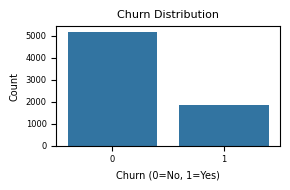

time: 616 ms (started: 2025-07-16 02:19:33 +00:00)


In [ ]:
# plot churn distribution
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure(figsize=(6,4))
# sns.countplot(x='Churn', data=df)
# plt.title('Churn Distribution')
# plt.xlabel('Churn (0 = No, 1 = Yes)')
# plt.ylabel('Count')
# plt.savefig('churn_dist.png', bbox_inches='tight')
# plt.show()
plt.figure(figsize=(3,2))  # smaller size
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution', fontsize=8)
plt.xlabel('Churn (0=No, 1=Yes)', fontsize=7)
plt.ylabel('Count', fontsize=7)
plt.tick_params(axis='both', which='major', labelsize=6)
plt.tight_layout()
plt.savefig('churn_dist_small.png', dpi=150, bbox_inches='tight')  # dpi higher for clarity
plt.show()

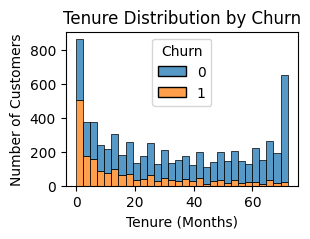

time: 1.13 s (started: 2025-07-16 02:20:51 +00:00)


In [ ]:
# Plot tenure distribution by churn
plt.figure(figsize=(3,2))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.savefig('tenue_dist_by_churn.png', bbox_inches='tight')
plt.show()


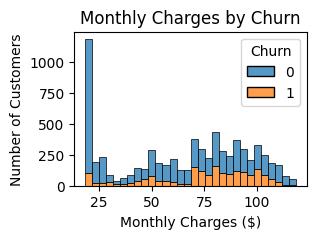

time: 859 ms (started: 2025-07-16 02:21:05 +00:00)


In [ ]:
# Plot monthly charges distribution by churn
plt.figure(figsize=(3,2))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.title('Monthly Charges by Churn')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')
plt.savefig('month_charges_by_churn.png', bbox_inches='tight')
plt.show()

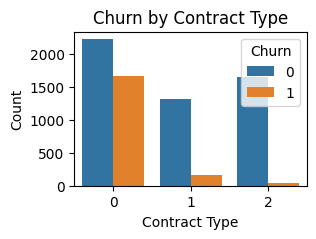

time: 464 ms (started: 2025-07-16 02:21:16 +00:00)


In [ ]:
# Bar plot: Contract type vs churn
plt.figure(figsize=(3,2))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.savefig('churn_by_contract_type.png', bbox_inches='tight')
plt.show()

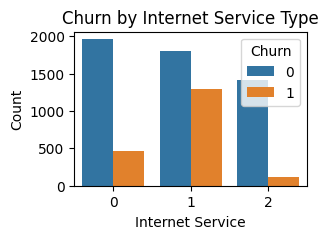

time: 537 ms (started: 2025-07-16 02:21:24 +00:00)


In [ ]:
# Bar plot: Internet service vs churn
plt.figure(figsize=(3,2))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.savefig('churn_by_internet.png', bbox_inches='tight')
plt.show()

#### Feature Engineering

##### Feature Selection and Splitting Data


In [ ]:
# We divide the data into input features (X) and the target (y),
# then split it into training and test sets.
from sklearn.model_selection import train_test_split

# Note: The below line cause a compile error -- customerID is already dropped
# at this point. I will comment out and correct the code - B.J.
# X = df.drop(['customerID', 'Churn'], axis=1)
X = df.drop('Churn', axis=1)
y = df['Churn'] # target

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)
print(X_train.dtypes)


gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object
time: 197 ms (started: 2025-07-12 23:47:28 +00:00)


##### Feature Scaling

Since our features vary in scale, we standardize them to help the model learn better and faster.

`StandardScaler()` shifts data to have a mean of 0 and a standard deviation of 1, putting all features on the same scale.

`fit_transform(X_train)`: fits and scales the training data.

`transform(X_test)`: scales the test data using the same parameters.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Capture feaures for evaluationm prior to scaling (must be dataframe)
churn_feature_names = X_train.columns

# Perform the scaling
churn_scaler = StandardScaler()
scaled_X_train = churn_scaler.fit_transform(X_train)
scaled_X_test = churn_scaler.transform(X_test)

'''
Side note: After this transformation, X_train and X_test are NumPy arrays,
not pandas DataFrames. Access to .columns, .head() is lost. Renamed for clarity
'''

'\nSide note: After this transformation, X_train and X_test are NumPy arrays,\nnot pandas DataFrames. Access to .columns, .head() is lost. Renamed for clarity\n'

time: 9.43 ms (started: 2025-07-12 23:47:32 +00:00)


### Model Training

In [ ]:
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Models and hyperparameter tuning
baseline_models = {
    "Logistic Regression": (LogisticRegression(max_iter=2000),
        {'C': [0.01, 0.1, 1, 10]}),
    "Decision Tree": (DecisionTreeClassifier(),
        {'max_depth': [3, 5, 7], 'criterion': ['gini', 'entropy']})
}

# Dictionary to store best estimators, predictions and probabilities
baseline_best_models = {}
baseline_preds = {}
baseline_probs = {}

# Training and evaluation
for name, (model, params) in baseline_models.items():
    grid = GridSearchCV(model, params, cv=5,
                        scoring='accuracy').fit(scaled_X_train, y_train)

    # Collect best model for later evaluation
    best_model = grid.best_estimator_
    baseline_best_models[name] = best_model

    # Collect model prediction for later evaluation
    baseline_preds[name] = best_model.predict(scaled_X_test)

    # Probabilities
    if hasattr(best_model, "predict_proba"):
        baseline_probs[name] = best_model.predict_proba(scaled_X_test)[:, 1]

    print(f"{name}:", grid.best_params_)
    print(classification_report(y_test, grid.predict(scaled_X_test)))


Logistic Regression: {'C': 0.01}
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.63      0.48      0.55       368

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Decision Tree: {'criterion': 'entropy', 'max_depth': 7}
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1041
           1       0.58      0.54      0.56       368

    accuracy                           0.78      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409

time: 1.36 s (started: 2025-07-12 23:47:34 +00:00)


### **Advanced Modeling**

In [ ]:
# Perform Hyperparametric Tuning
# Create parameter grid for RF
'''
Random Forest Hyperparameters Not Used:
    max_leaf_nodes: Max number of leaf nodes
    bootstrap: Whether bootstrap samples are used
    n_jobs: Number of cores used for training
'''
churn_randomforest_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced'],
    'random_state': [42],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
}

# Create parameter grid for XGB
'''
XGBoost Hyperparameters Not Used:
    objective: Learning task (binary classification = 'binary:logistic')
    eval_metric: Metric to evaluate on validation set
'''
churn_xgboost_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.1, 0.2],
    'random_state': [42],
    'objective': ['binary:logistic'],
}

time: 963 µs (started: 2025-07-12 23:47:42 +00:00)


### **Find the Best Values**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

print("Tuning takes approxmiately 3 minutes...")
# Random Forest Grid Search
churn_rf_grid = GridSearchCV(
    RandomForestClassifier(),
    churn_randomforest_param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)
churn_rf_grid.fit(scaled_X_train, y_train)

# XGBoost Grid Search
churn_xgb_grid = GridSearchCV(
    XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    churn_xgboost_param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)
churn_xgb_grid.fit(scaled_X_train, y_train)

Tuning takes approxmiately 3 minutes...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 384 candidates, totalling 1920 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:14:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 6],
                         'min_child_weight': [1, 5], 'n_estimators': [100, 200],
                         'objective': ['binary:logistic'], 'random_state': [42],
                         'scale_pos_weight': [1, 2], 'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

time: 5min 20s (started: 2025-07-13 00:09:36 +00:00)


### **Advanced Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Display Results of Random Forest
print("Best Churn RF Params:", churn_rf_grid.best_params_)

# Best model for Random Forest
churn_rf_best_model = churn_rf_grid.best_estimator_
print(classification_report(y_test,
                            churn_rf_best_model.predict(scaled_X_test)))

# Display Results for XGBoost
print("Best XGB Params:", churn_xgb_grid.best_params_)

# Best model for XGB
churn_xgb_best_model = churn_xgb_grid.best_estimator_
print(classification_report(y_test,
                            churn_xgb_best_model.predict(scaled_X_test)))

Best Churn RF Params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1041
           1       0.49      0.78      0.60       368

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.75      1409

Best XGB Params: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'objective': 'binary:logistic', 'random_state': 42, 'scale_pos_weight': 2, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1041
           1       0.54      0.70      0.61       368

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72   

## Interpretation

### **Generate Predictions**

In [ ]:
# Create Predictions and Probabilities for Random Forest
churn_rf_preds = churn_rf_best_model.predict(scaled_X_test)
churn_rf_probs = churn_rf_best_model.predict_proba(scaled_X_test)[:, 1]

# Create Predictions and Probabilities for XGBoost
churn_xgb_preds = churn_xgb_best_model.predict(scaled_X_test)
churn_xgb_probs = churn_xgb_best_model.predict_proba(scaled_X_test)[:, 1]

time: 42.1 ms (started: 2025-07-13 00:16:11 +00:00)


### **Make Confusion Matrices**

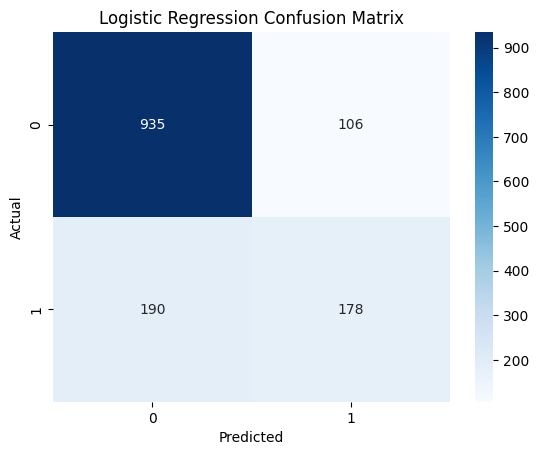

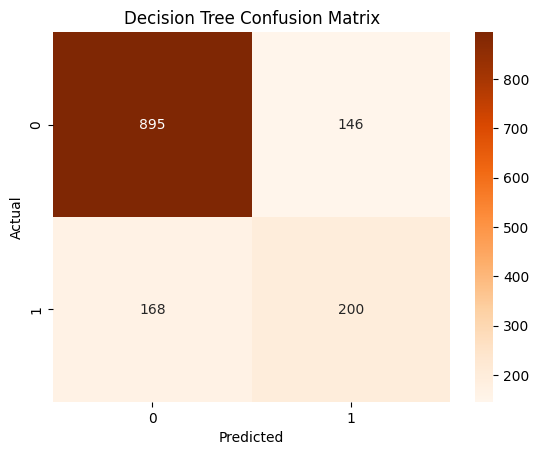

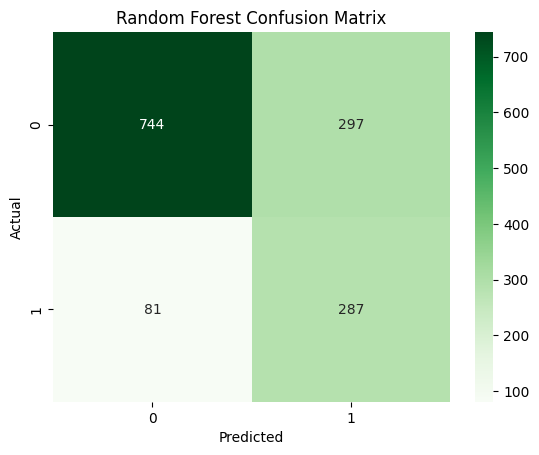

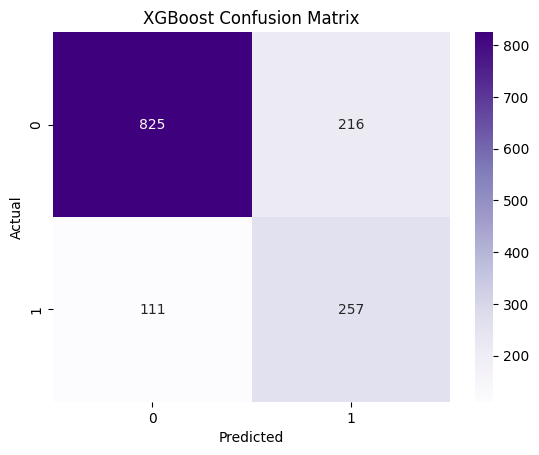

time: 1.01 s (started: 2025-07-13 00:16:13 +00:00)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_actual, y_pred, title, map_color='Blues'):
    cm = confusion_matrix(y_actual, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=map_color)
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Save the figure with model name in filename
    plot_filename = f"{title.replace(' ', '_').lower()}_confusion_matrix.png"
    plt.savefig(plot_filename, bbox_inches='tight')
    plt.show()

# Draw earlier modeling matrices
plot_conf_matrix(y_test,
                baseline_preds["Logistic Regression"],
                "Logistic Regression"
)

plot_conf_matrix(y_test,
                baseline_preds["Decision Tree"],
                "Decision Tree",
                "Oranges"
)

# Draw both matrices for the Advanced modeling.
plot_conf_matrix(y_test, churn_rf_preds, "Random Forest", "Greens")
plot_conf_matrix(y_test, churn_xgb_preds, "XGBoost", 'Purples')

### **Generate ROC Curves**

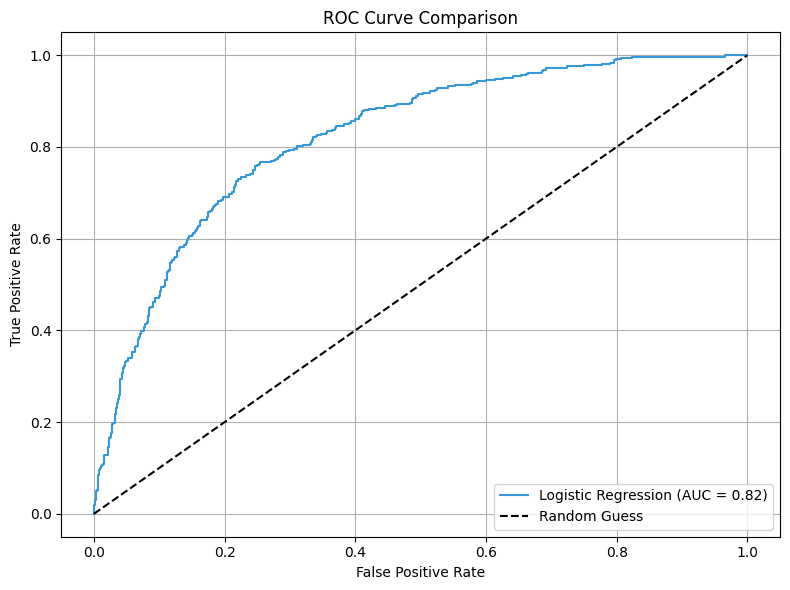

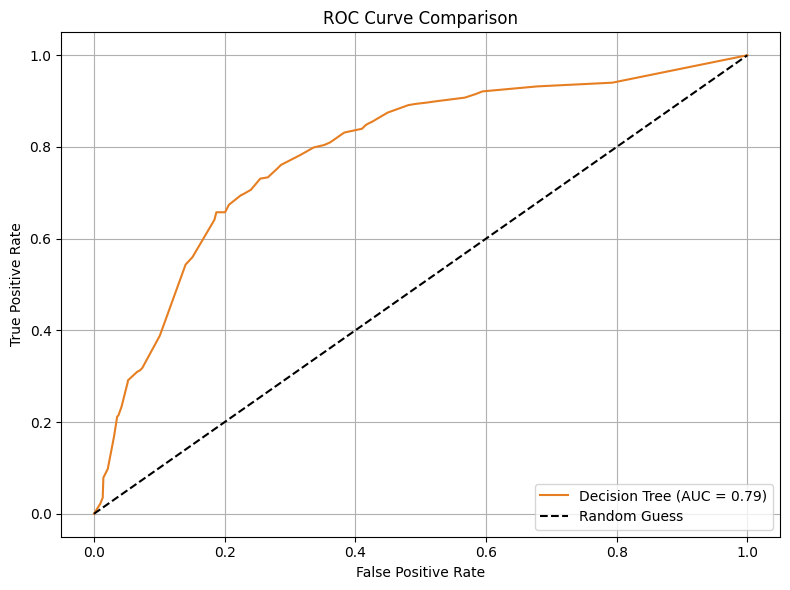

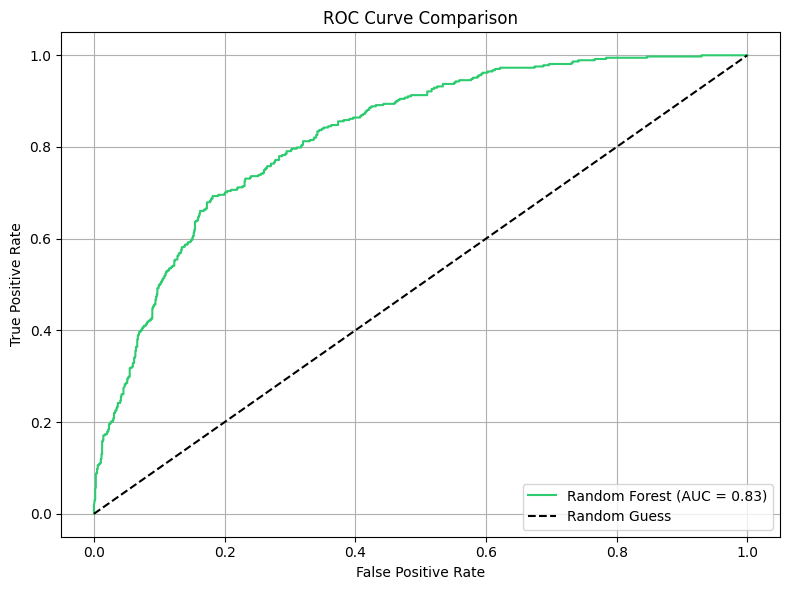

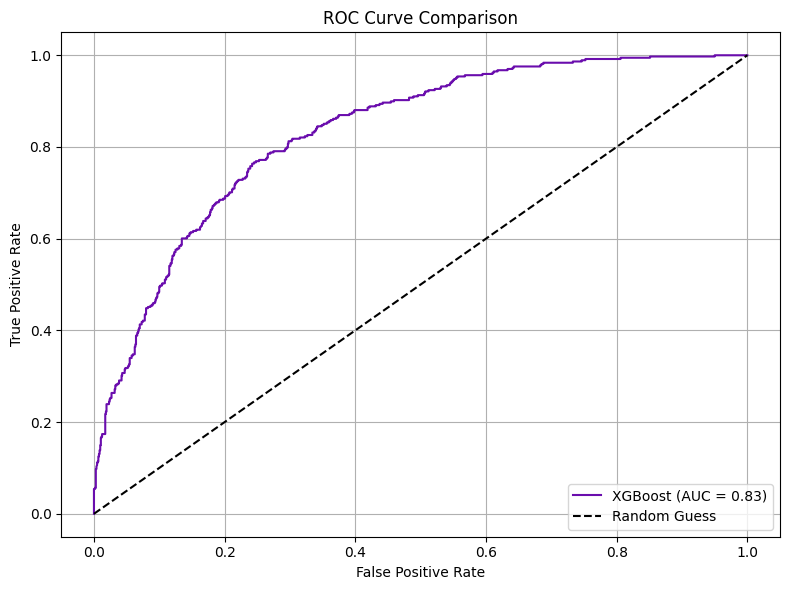

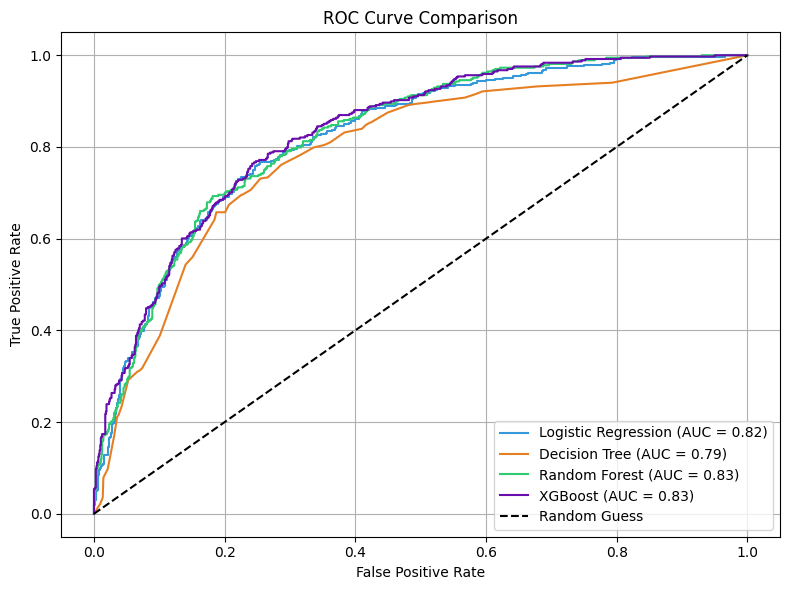

time: 1.62 s (started: 2025-07-13 00:16:19 +00:00)


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


plot_counter = 1
# Mirror the color mappings from conf matrices
MODEL_COLORS = {
    "Logistic Regression": "#3498db",   # blue
    "Decision Tree": "#e67e22",         # orange
    "Random Forest": "#2ecc71",         # green
    "XGBoost": "#6a0dad"                # purple
}

def plot_roc_curves(y_true, model_probs_dict):
    '''
    Generates a reuseable roc curve for multiple models.
    '''
    global plot_counter
    plt.figure(figsize=(8, 6))

    # Iterate through the input models and draw lines
    for model_name, probs in model_probs_dict.items():
        fpr, tpr, _ = roc_curve(y_true, probs)
        roc_auc = auc(fpr, tpr)
        mod_color = MODEL_COLORS.get(model_name, None)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})",
                 color=mod_color)

    # Standard random guess line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.title("ROC Curve Comparison")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()

    # File will be saved for later extraction
    plt.savefig(f'churn_roc_curve_{plot_counter}.png', bbox_inches='tight')
    plot_counter += 1
    plt.show()

# Draw the plot with Logistic Regression model
plot_roc_curves(
    y_test,
    {
        "Logistic Regression": baseline_probs["Logistic Regression"]
    }
)

# Draw the plot with Decision Tree model
plot_roc_curves(
    y_test,
    {
        "Decision Tree": baseline_probs["Decision Tree"]
    }
)

# Draw the plot with Random Forest model
plot_roc_curves(
    y_test,
    {
        "Random Forest": churn_rf_probs
    }
)

# Draw the plot with XGBoost model
plot_roc_curves(
    y_test,
    {
        "XGBoost": churn_xgb_probs
    }
)

# Draw the plot with combined models
plot_roc_curves(
    y_test,
    {
        "Logistic Regression": baseline_probs["Logistic Regression"],
        "Decision Tree": baseline_probs["Decision Tree"],
        "Random Forest": churn_rf_probs,
        "XGBoost": churn_xgb_probs
    }
)

### **Evaluate Feature Importance**

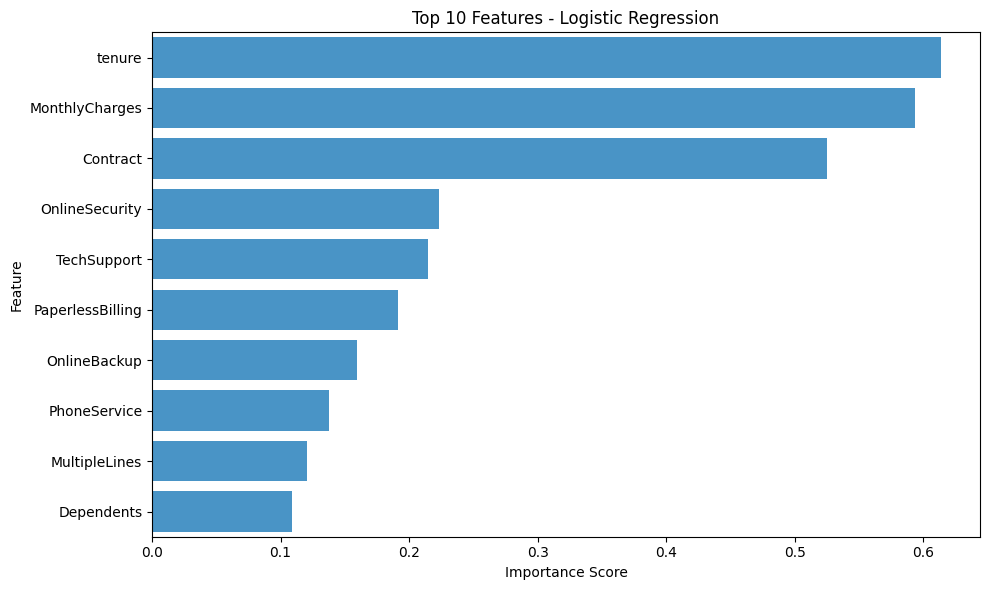

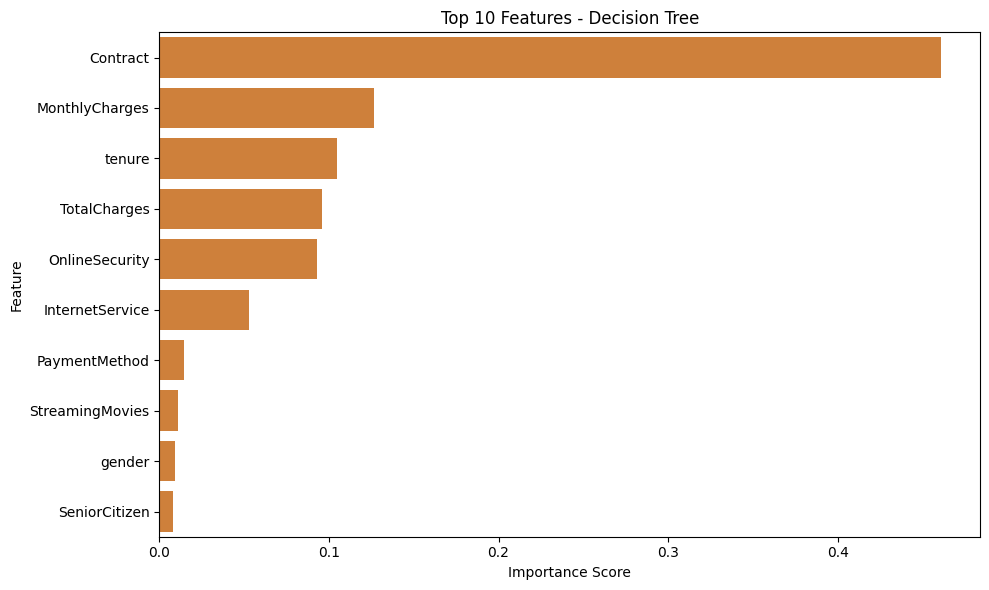

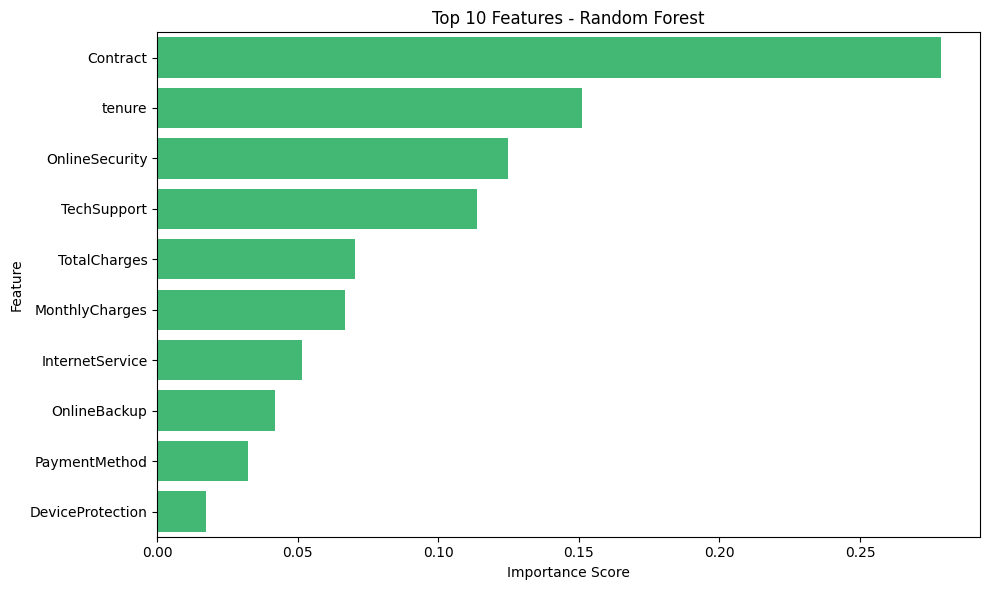

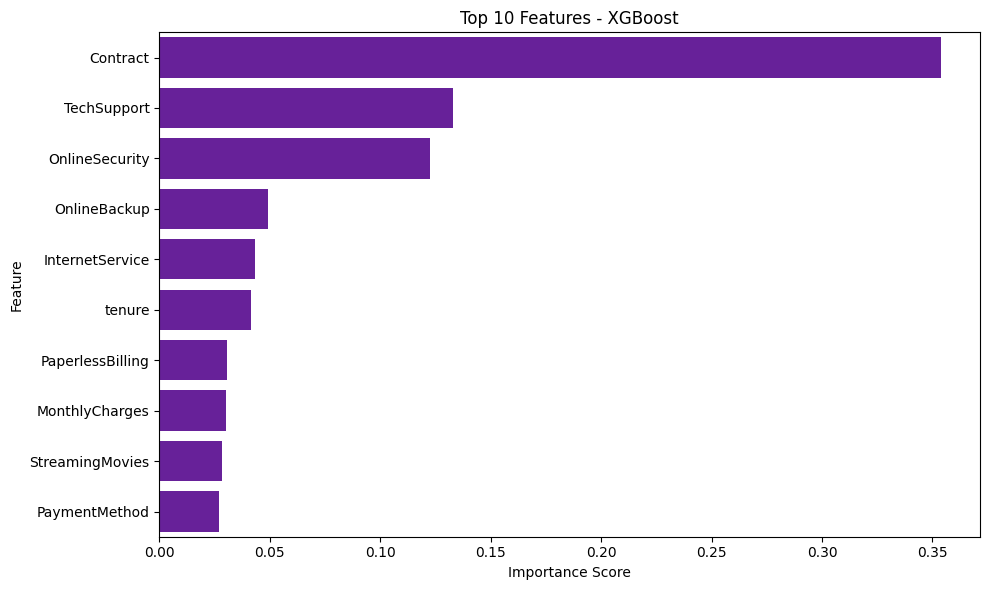

time: 2.01 s (started: 2025-07-13 00:17:13 +00:00)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def generate_feature_importance_plot(model, feature_names, title):
    if hasattr(model, "feature_importances_"):
        # For tree-based models
        feat_importances = model.feature_importances_
    elif hasattr(model, "coef_"):
        # For linear models like Logistic Regression
        feat_importances = np.abs(model.coef_[0])
    else:
        raise AttributeError("Model does not support feature importances.")

    # In Descending Order
    indices = np.argsort(feat_importances)[::-1]

    # Plot top 10
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feat_importances[indices][:10],
            y=np.array(churn_feature_names)[indices][:10],
            color=MODEL_COLORS[title])

    plt.title(f"Top 10 Features - {title}")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()

    # Save the figure with model name in filename
    plot_filename = f"{title.replace(' ', '_').lower()}_feature_imp.png"
    plt.savefig(plot_filename, bbox_inches='tight')
    plt.show()

# Get feature importances from trained Logistic Regression
model_name = "Logistic Regression"
generate_feature_importance_plot(baseline_best_models[model_name],
                                 churn_feature_names,
                                 model_name)

# Get feature importances from trained Decision Tree
model_name = "Decision Tree"
generate_feature_importance_plot(baseline_best_models[model_name],
                                 churn_feature_names,
                                 model_name)

# Get feature importances from trained Random Forest
generate_feature_importance_plot(churn_rf_best_model,
                                 churn_feature_names,
                                 "Random Forest")

# Get feature importances from trained XGBoost
generate_feature_importance_plot(churn_xgb_best_model,
                                 churn_feature_names,
                                 "XGBoost")
